### Audio encoding and reversal example

In this notebook I used librosa to encode an audio file into a mel spectrogram, and the reverse it back into audio.

In [11]:
import IPython.display as ipd
import librosa.display
from librosa.feature import melspectrogram
from librosa.feature.inverse import mel_to_audio
import matplotlib.pyplot as plt

import numpy as np
from typing import Tuple

PATH_TO_AUDIO: str = '../audio-files'
SAMPLE_RATE = 22_050

Load audio.

In [12]:
sample, _ = librosa.load(f'{PATH_TO_AUDIO}/mandolin.wav', mono=True)  # type: Tuple[np.ndarray, int]
ipd.Audio(sample, rate=SAMPLE_RATE)

Encode audio into a mel spectrogram.

In [13]:
encoded_sample: np.ndarray = melspectrogram(sample, sr=SAMPLE_RATE, n_fft=2_048)

Display spectrogram.

In [14]:
def display_mel_spectrogram(mel_spectrogram: np.ndarray, sample_rate: int = 22_050) -> None:
    """
    :param mel_spectrogram: np.ndarray that is returned from librosa.feature.melspectrogram
    :param sample_rate: sample rate.
    :return: None

    Displays a mel spectrogram.
    """

    fig, ax = plt.subplots()
    S_dB: np.ndarray = librosa.power_to_db(mel_spectrogram, ref=np.max)

    image = librosa.display.specshow(
        S_dB,
        x_axis='time',
        y_axis='mel',
        sr=sample_rate,
        fmax=8000,
        ax=ax
    )

    fig.colorbar(image, ax=ax, format='%+2.0f dB')
    ax.set(title='Mel-frequency spectrogram')
    plt.show()

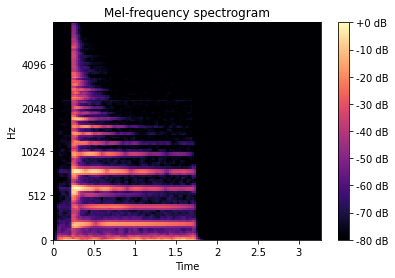

In [15]:
display_mel_spectrogram(encoded_sample)

Convert mel spectrogram back into audio.

In [16]:
reversed_sample: np.ndarray = mel_to_audio(encoded_sample, sr=SAMPLE_RATE, n_iter=32)
ipd.Audio(reversed_sample, rate=SAMPLE_RATE)